## Лабораторная работа 5

Построить прогноз на 8 месяцев. 

Общее описание данных

Гостиницы Чикаго.

В таблицах представлена статистика коэффициента загрузки гостиниц и средней цены по двум районам Чикаго: Chicago Central Business District Hotel Statistics и Chicago Metropolitan Area Hotel Statistics

Данные собирались ежемесячно с января 1994 по апрель 2003

Вариант 3: 

Коэффициент загрузки гостиниц в процентах (`Hotel Occupancy` (in %))

Данные для Chicago Central Business District Hotel Statistics. Предоставлены средние значения процента занятых номеров за один день. Усреднение по отелям и по дням месяца.

Данные расположены в столбце `x3`

In [238]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn')
%matplotlib inline

In [239]:
df = pd.read_csv('Chicago_hotels.csv', sep=';')
df.head()

,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


In [240]:
df.tail(10)

,date1,date2,x1,x2,x3,x4
110,March,2003,65,147.32,55.9,99.62
111,April,2003,69,150.72,58.4,101.32
112,May,2003,,,,
113,June,2003,,,,
114,July,2003,,,,
115,August,2003,,,,
116,September,2003,,,,
117,October,2003,,,,
118,November,2003,,,,
119,December,2003,,,,


Пустные значения заполнены `' '`. Заменим их NaN из numpy и сделаем числовыми данными

In [241]:
data = pd.DataFrame({'fullness' : pd.to_numeric(df.x3.replace(' ', np.nan)),
                     'month_num' : list(range(1, 121))})
data.head()

,fullness,month_num
0,51.9,1
1,60.1,2
2,65.0,3
3,69.8,4
4,72.4,5


Построим график продаж.

На графике виден линейный тренд, который меняется после 60 месяца и мультипликативная сезонность.

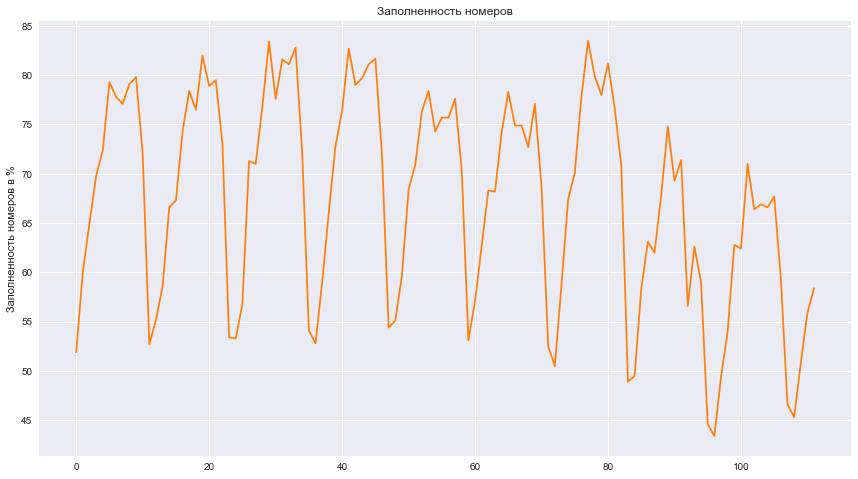

In [242]:
fig = plt.figure(figsize=(32, 8))
ax = fig.add_subplot(121)
data.fullness.plot(ax=ax,  color='tab:orange')
ax.set_title(u'Заполненность номеров')
ax.set_ylabel(u'Заполненность номеров в %')
plt.show()

In [243]:
data.shape[0] / 12

10.0

In [244]:
#  Индикаторы месяцев

data["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(data)]
data["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*10)[0:len(data)]
data["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*10)[0:len(data)]
data["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*10)[0:len(data)]
data["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*10)[0:len(data)]
data["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*10)[0:len(data)]
data["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*10)[0:len(data)]
data["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*10)[0:len(data)]
data["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*10)[0:len(data)]
data["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*10)[0:len(data)]
data["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*10)[0:len(data)]
data["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*10)[0:len(data)]

In [245]:
data.tail(10)

,fullness,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
110,55.9,111,0,0,1,0,0,0,0,0,0,0,0,0
111,58.4,112,0,0,0,1,0,0,0,0,0,0,0,0
112,NaN,113,0,0,0,0,1,0,0,0,0,0,0,0
113,NaN,114,0,0,0,0,0,1,0,0,0,0,0,0
114,NaN,115,0,0,0,0,0,0,1,0,0,0,0,0
115,NaN,116,0,0,0,0,0,0,0,1,0,0,0,0
116,NaN,117,0,0,0,0,0,0,0,0,1,0,0,0
117,NaN,118,0,0,0,0,0,0,0,0,0,1,0,0
118,NaN,119,0,0,0,0,0,0,0,0,0,0,1,0
119,NaN,120,0,0,0,0,0,0,0,0,0,0,0,1


In [246]:
#  Создаем матрицу предикторов.
#  Убираем из нее отклик и столбец индикаторов базового месяца, а также данные для которых нет отклика
#  За базу берем январь - месяц минимальной заполнености
X = data.drop(columns=["fullness", "m01"])[0:112]
#  Создаем матрицу (столбец) откликов.
y = data.fullness[0:112]

In [247]:
from sklearn.linear_model import LinearRegression

In [248]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [249]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,57.138035
1,month_num,-0.104146
2,m02,6.104146
3,m03,13.408292
4,m04,16.232438
5,m05,21.537263
6,m06,27.352521
7,m07,23.667778
8,m08,25.060813
9,m09,23.576070


In [250]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [251]:
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,57.138035,0.000000e+00
1,month_num,-0.104146,2.220446e-15
2,m02,6.104146,5.904407e-04
3,m03,13.408292,4.254597e-12
4,m04,16.232438,8.881784e-16
5,m05,21.537263,0.000000e+00
6,m06,27.352521,0.000000e+00
7,m07,23.667778,0.000000e+00
8,m08,25.060813,0.000000e+00
9,m09,23.576070,0.000000e+00


<AxesSubplot:>

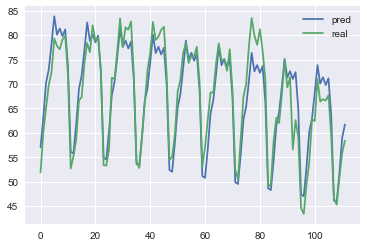

In [252]:
#  Сравним подгонку и ряд из логарифмов продаж

pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

## Делаем прогноз

In [253]:
y_real = data.fullness
X = data.drop(columns=["fullness", "m01"])
y_preds = model.predict(X)

<AxesSubplot:>

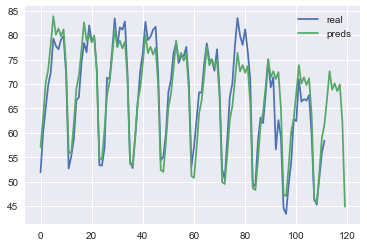

In [254]:
prediction = pd.DataFrame({'real' : y_real, 'preds' : y_preds})
prediction.plot()

Так как тренд меняет свой наклон после 60 месяца, то можно предположить, что наша модель может некорректно делать прогноз на следующие 8 месяцев.

Обучим нашу модель на данных после 60 месяца и сравним её с моделью, обучающейся на всех данных

In [255]:
#  Берем данные после 62 месяца и для которых имеются отклики
X_60 = data.drop(columns=["fullness", "m01"])[60:112]
y_60 = data.fullness[60:112]

In [256]:
model.fit(X_60, y_60)

LinearRegression()

In [257]:
y_real_60 = data.fullness[60:]
X_60 = data.drop(columns=["fullness", "m01"])[60:]
y_preds_60 = model.predict(X_60)

Сравним показания моделей

<AxesSubplot:>

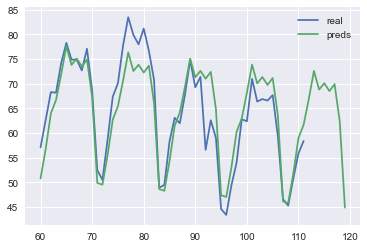

In [258]:
prediction = pd.DataFrame({'real' : y_real[60:], 'preds' : y_preds[60:]})
prediction.plot()

<AxesSubplot:>

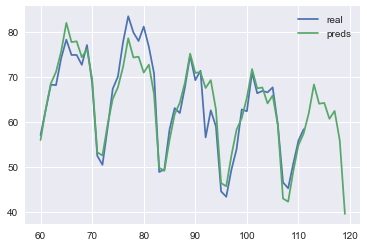

In [259]:
prediction = pd.DataFrame({'real' : y_real_60, 'preds' : y_preds_60})
prediction.plot()

In [260]:
from sklearn.metrics import mean_squared_error

In [261]:
mean_squared_error( y_real[60:112], y_preds[60:112])

19.9259470164608

In [262]:
# количество данных с 60 месяца, о которых мы знаем заполненность отеля
dif = 112 - 60

In [263]:
mean_squared_error( y_real_60[:dif], y_preds_60[:dif])

11.318189903846152

Действительно, модель обученная на всех данных хочет потогнать предсказания для всех наблюдений, что становится причиной плохой предсказательной способности.

## Предсказания на 8 месяцев

In [237]:
y_preds_60[dif:].round()

array([62., 68., 64., 64., 61., 62., 56., 40.])